# Decision Tree and Random Forest

## Install and import libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import os

# for graphs
import matplotlib.pyplot as plt

# dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

# import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

# this can be used to save/load entire trained models (if we may wanna use)
from joblib import dump, load

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/HAPT Data Set"


Mounted at /content/drive
/content/drive/MyDrive/HAPT Data Set


## Load files/data, constants

In [ ]:
## Load labels
label_dict = {1: "WALKING",
              2: "WALKING_UPSTAIRS",
              3: "WALKING_DOWNSTAIRS",
              4: "SITTING",
              5: "STANDING",
              6: "LAYING",
              7: "STAND_TO_SIT",
              8: "SIT_TO_STAND", 
              9: "SIT_TO_LIE", 
              10: "LIE_TO_SIT",
              11: "STAND_TO_LIE",
              12: "LIE_TO_STAND"}
label_dict_rev = {v: k for k, v in label_dict.items()}
label_list = list(label_dict.values())

In [ ]:
x_train = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Train/X_train.txt', header = None, sep=" ")
y_train = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Train/y_train.txt', header = None)
x_test = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Test/X_test.txt', header = None, sep=" ")
y_test = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Test/y_test.txt', header = None)

In [ ]:
## To save as csv
# x_train.to_csv(r'/content/drive/MyDrive/HAPT Data Set/Train/x_train.csv', index = False)
# y_train.to_csv(r'/content/drive/MyDrive/HAPT Data Set/Train/y_train.csv', index = False)
# x_test.to_csv(r'/content/drive/MyDrive/HAPT Data Set/Test/x_test.csv', index = False)
# y_test.to_csv(r'/content/drive/MyDrive/HAPT Data Set/Test/y_test.csv', index = False)

In [ ]:
##features
features_read = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/features.txt', header = None)

headers = features_read.transpose().values.tolist()[0]
for i, h in enumerate(headers):
  headers[i] = h.strip()

In [ ]:
## For use if .txt converted to csv
# x_train = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Train/x_train.csv')
# y_train = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Train/y_train.csv')
# x_test= pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Test/x_test.csv')
# y_test = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Test/y_test.csv')

In [ ]:
# Extract ID
train_subject_id = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Train/subject_id_train.txt', header=None)
train_subject_id.columns=['id']
test_subject_id = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/Test/subject_id_test.txt', header=None)
test_subject_id.columns=['id']

In [ ]:
#Add headers for x data
# x_train = x_train['0'].str.split(' ', expand = True)
x_train.columns = headers
x_test.columns = headers


In [ ]:
#replace y data numbers to labels
y_train.columns = ["Label"]
y_test.columns = ["Label"]

In [ ]:
# y_train_word = y_train.replace(label_dict)
# y_test_word = y_test.replace(label_dict)
y_train = y_train.replace(label_dict)
y_test = y_test.replace(label_dict)

In [ ]:
## Convert to csv with changed labels
# x_train.to_csv(r'/content/drive/MyDrive/HAPT Data Set/x_train.csv', index=False)
# y_train.to_csv(r'/content/drive/MyDrive/HAPT Data Set/y_train.csv', index=False)
# x_test.to_csv(r'/content/drive/MyDrive/HAPT Data Set/x_test.csv', index=False)
# y_test.to_csv(r'/content/drive/MyDrive/HAPT Data Set/y_test.csv', index=False)
# y_train_word.to_csv(r'/content/drive/MyDrive/HAPT Data Set/y_train_word.csv', index=False)
# y_test_word.to_csv(r'/content/drive/MyDrive/HAPT Data Set/y_test_word.csv', index=False)


In [ ]:
#Verify data input
# print(x_train.head())
# print(y_train.head())
# print(x_test.head())
# print(y_test.head())
# print(y_train_word.head())
# print(y_test_word.head())

In [ ]:
## If saved as csv
# x_train = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/x_train.csv')
# y_train = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/y_train_word.csv')
# x_test= pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/x_test.csv')
# y_test = pd.read_csv(r'/content/drive/MyDrive/HAPT Data Set/y_test_word.csv')

In [ ]:
## Verify
# print(x_train.head())
# print(y_train.head())
# print(x_test.head())
# print(y_test.head())

      Label
0  STANDING
1  STANDING
2  STANDING
3  STANDING
4  STANDING


# Data Inspection

In [ ]:
x_train

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [ ]:
x_test

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,0.052279,-0.038687,-0.013494,-0.287933,-0.403601,-0.431550,-0.356012,-0.433826,-0.534817,0.244280,...,0.125445,-0.390349,-0.752788,-0.337422,0.346295,0.884904,-0.698885,-0.652416,0.274605,0.190104
3158,0.073745,-0.024673,-0.017836,-0.305455,-0.286487,-0.417996,-0.373468,-0.354849,-0.557925,0.244280,...,0.150787,-0.336001,-0.703532,-0.736701,-0.372889,-0.657421,0.322548,-0.655858,0.273556,0.187748
3159,0.068334,0.043822,-0.024135,-0.329706,-0.335273,-0.456965,-0.387944,-0.423504,-0.604403,0.079255,...,-0.004765,-0.139894,-0.476335,-0.181560,0.088574,0.696664,0.363139,-0.656034,0.274457,0.186527
3160,0.023016,0.032345,-0.011830,-0.323182,-0.465502,-0.426108,-0.392307,-0.520848,-0.569571,0.079255,...,0.013540,-0.224141,-0.623083,0.444558,-0.819188,0.929294,-0.008398,-0.660387,0.264759,0.192865


In [ ]:
print("Shape: (" + str(x_train.shape[0]) + ", " + str(x_train.shape[1]) + ")")

Shape: (7767, 561)


In [ ]:
x_train.describe()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,0.161745,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.237319,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.958535,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,0.020312,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,0.170819,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,0.316240,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,1.000000,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000


In [ ]:
type(y_train.value_counts())

pandas.core.series.Series

In [ ]:
temp = y_train.value_counts()
temp = temp.rename(index=label_dict)
temp

Label             
STANDING              1423
LAYING                1413
SITTING               1293
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     987
STAND_TO_LIE            90
SIT_TO_LIE              75
LIE_TO_SIT              60
LIE_TO_STAND            57
STAND_TO_SIT            47
SIT_TO_STAND            23
dtype: int64

In [ ]:
# calculate how many participants contributed to each label
# note theres some samples with only 
temp = y_train.copy()
temp = temp.replace(label_dict)
temp["id"] = train_subject_id
temp.value_counts()

Label         id
WALKING       1     95
STANDING      21    94
LAYING        21    90
SITTING       21    85
LAYING        19    84
                    ..
SIT_TO_STAND  6      1
              5      1
LIE_TO_SIT    7      1
STAND_TO_SIT  8      1
SIT_TO_STAND  15     1
Length: 244, dtype: int64

In [ ]:
temp.value_counts().tail(15)

Label         id
STAND_TO_SIT  30    2
LIE_TO_SIT    16    2
SIT_TO_STAND  26    1
              19    1
              23    1
              21    1
              28    1
              3     1
LIE_TO_STAND  27    1
              8     1
SIT_TO_STAND  6     1
              5     1
LIE_TO_SIT    7     1
STAND_TO_SIT  8     1
SIT_TO_STAND  15    1
dtype: int64

In [ ]:
# inspection of how many participants contributed to the walking label
temp.value_counts().loc["WALKING"]

id
1     95
25    74
30    65
17    61
23    59
14    59
26    59
11    59
3     58
7     57
6     57
27    57
5     56
15    54
28    54
29    53
21    52
19    52
16    51
8     48
22    46
dtype: int64

## Observations

Among the normalized features, there are features whose mean are very far from 0 (e.g. -0.6 or -0.69). While some features have a large standard deviation (\~0.4), some others have rather small ones (\~0.1), indicating that some features will likely be more useful than others

There is a significant class imbalance if we consider all of the labels together. However, this imbalance is less significant when comparing within only static/dynamic activities (standing, lying, sitting, walking, walking upstairs, walking downstairs) and postural transitions(stand-to-lie, sit-to-lie, lie-to-sit, lie-to-stand, stand-to-sit, sit-to-stand)

There are some labels in which some participants have only contributed 1 or very few samples

## Feature Selection

In [ ]:
# feature selection
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns

In [ ]:
# feature importance using anova f-value
select = SelectKBest()
x_new = select.fit_transform(x_train, np.ravel(y_train))

Text(0, 0.5, 'Feature Importance Score')

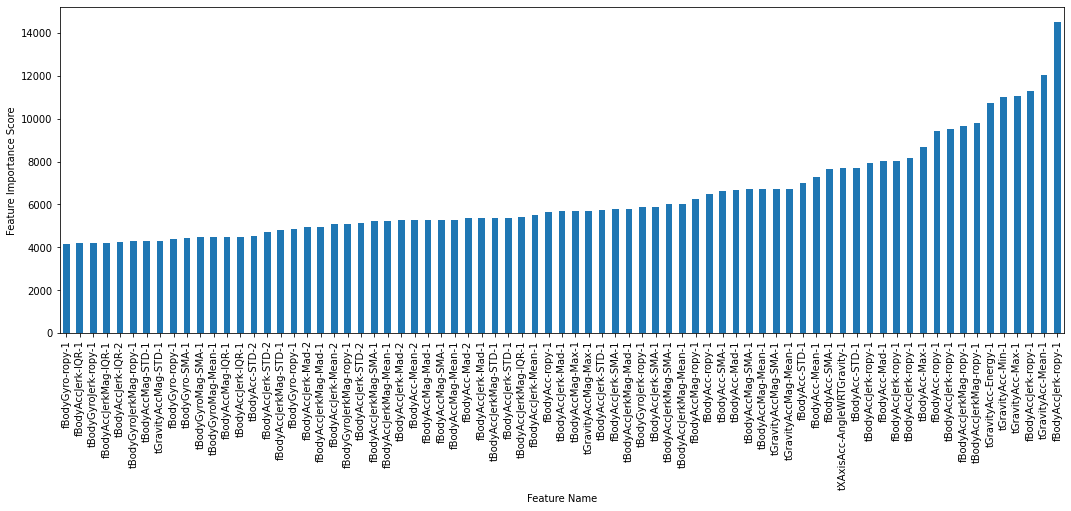

In [ ]:
# 75 most important features
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
pd.Series(select.scores_, index=x_train.columns).sort_values().tail(75).plot.bar(ax=ax)
ax.set_xlabel('Feature Name')
ax.set_ylabel('Feature Importance Score')

Text(0, 0.5, 'Feature Importance Score')

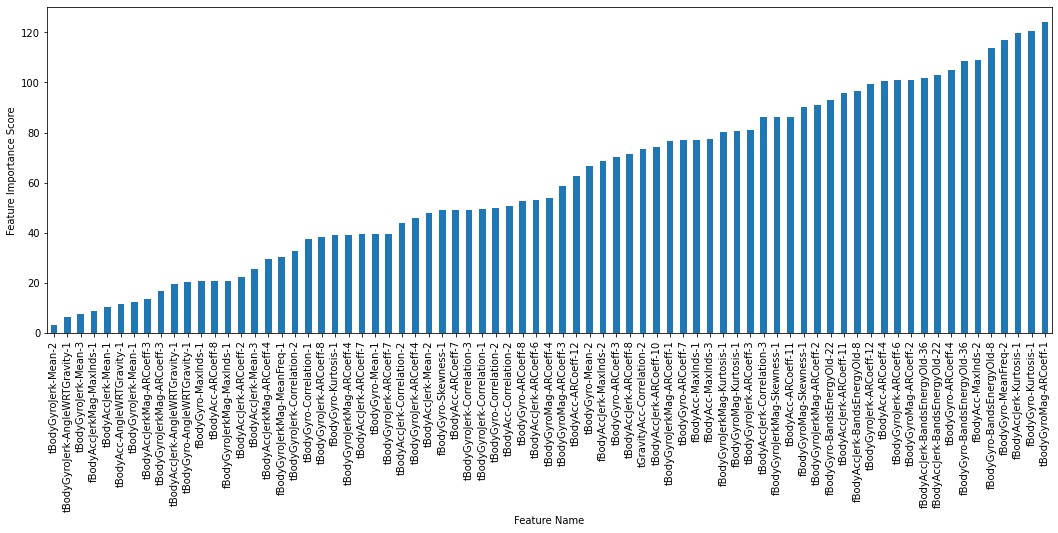

In [ ]:
# 75 least important features
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
pd.Series(select.scores_, index=x_train.columns).sort_values().head(75).plot.bar(ax=ax)
ax.set_xlabel('Feature Name')
ax.set_ylabel('Feature Importance Score')

Text(0, 0.5, 'Feature Importance Score')

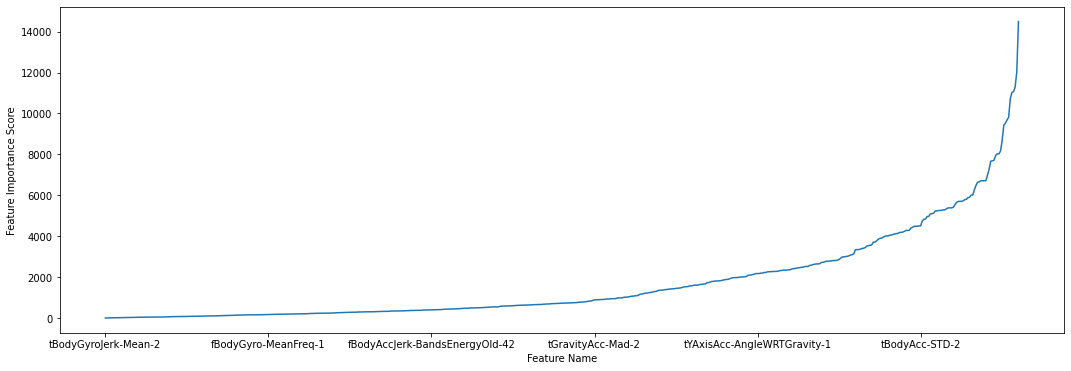

In [ ]:
# 75 least important features
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
pd.Series(select.scores_, index=x_train.columns).sort_values().plot.line(ax=ax)
ax.set_xlabel('Feature Name')
ax.set_ylabel('Feature Importance Score')

In [ ]:
pd.Series(select.scores_).describe()

count      561.000000
mean      1730.993772
std       2216.837706
min          3.220323
25%        246.795758
50%        728.095328
75%       2361.761590
max      14496.239726
dtype: float64

In [ ]:
# there are about 30 features with scores above 6000
pd_scores = pd.Series(select.scores_)
len(pd_scores[pd_scores > 6000])

30

In [ ]:
# feature important using anova f-value
num_of_features = 50
select = SelectKBest(k=num_of_features)
x_train_new = select.fit_transform(x_train, np.ravel(y_train))
selected_cols_index = select.get_support(indices=True)
selected_cols = pd.Series(x_train.columns)
selected_cols = selected_cols[selected_cols_index]
x_train_new = pd.DataFrame(x_train_new, columns=selected_cols)
x_test_new = x_test.iloc[:, selected_cols_index]

In [ ]:
# columns that were selected
selected_cols

3                   tBodyAcc-STD-1
6                   tBodyAcc-Mad-1
9                   tBodyAcc-Max-1
15                  tBodyAcc-SMA-1
40              tGravityAcc-Mean-1
49               tGravityAcc-Max-1
52               tGravityAcc-Min-1
56            tGravityAcc-Energy-1
83              tBodyAccJerk-STD-1
86              tBodyAccJerk-Mad-1
87              tBodyAccJerk-Mad-2
95              tBodyAccJerk-SMA-1
102            tBodyAccJerk-ropy-1
103            tBodyAccJerk-ropy-1
104            tBodyAccJerk-ropy-1
184           tBodyGyroJerk-ropy-1
200             tBodyAccMag-Mean-1
203              tBodyAccMag-Max-1
205              tBodyAccMag-SMA-1
213          tGravityAccMag-Mean-1
216           tGravityAccMag-Max-1
218           tGravityAccMag-SMA-1
226         tBodyAccJerkMag-Mean-1
227          tBodyAccJerkMag-STD-1
228          tBodyAccJerkMag-Mad-1
231          tBodyAccJerkMag-SMA-1
233          tBodyAccJerkMag-IQR-1
234         tBodyAccJerkMag-ropy-1
265                f

In [ ]:
x_train_new

,tBodyAcc-STD-1,tBodyAcc-Mad-1,tBodyAcc-Max-1,tBodyAcc-SMA-1,tGravityAcc-Mean-1,tGravityAcc-Max-1,tGravityAcc-Min-1,tGravityAcc-Energy-1,tBodyAccJerk-STD-1,tBodyAccJerk-Mad-1,...,fBodyAccJerk-SMA-1,fBodyAccJerk-ropy-1,fBodyAccJerk-ropy-1,fBodyAccJerk-ropy-1,fBodyAccMag-Mean-1,fBodyAccMag-Mad-1,fBodyAccMag-SMA-1,fBodyAccMag-ropy-1,fBodyAccJerkMag-ropy-1,tXAxisAcc-AngleWRTGravity-1
0,-0.995381,-0.995007,-0.794796,-0.975752,0.960051,0.892055,0.977436,0.891821,-0.993519,-0.994437,...,-0.990984,-1.000000,-1.000000,-1.000000,-0.951550,-0.948524,-0.951550,-0.646376,-1.000000,-0.841559
1,-0.998348,-0.998702,-0.802537,-0.987427,0.963215,0.892060,0.984520,0.900148,-0.995548,-0.995582,...,-0.990320,-1.000000,-1.000000,-1.000000,-0.980243,-0.975426,-0.980243,-0.816674,-1.000000,-0.845092
2,-0.995482,-0.996415,-0.798477,-0.988528,0.963532,0.892401,0.986770,0.900984,-0.990743,-0.990883,...,-0.987706,-1.000000,-1.000000,-1.000000,-0.987179,-0.985241,-0.987179,-0.907014,-1.000000,-0.849230
3,-0.996194,-0.996994,-0.798477,-0.990389,0.964269,0.893817,0.986821,0.902929,-0.992697,-0.994216,...,-0.993127,-1.000000,-1.000000,-1.000000,-0.986903,-0.983171,-0.986903,-0.907014,-1.000000,-0.848947
4,-0.998241,-0.998216,-0.801982,-0.995057,0.964878,0.893817,0.987434,0.904536,-0.996420,-0.996547,...,-0.993729,-1.000000,-1.000000,-1.000000,-0.992973,-0.991970,-0.992973,-0.907014,-1.000000,-0.848164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,-0.195448,-0.282233,0.267874,-0.288219,0.919814,0.867718,0.920554,0.787540,-0.299527,-0.354186,...,-0.294655,0.546273,0.455341,0.173712,-0.096767,-0.007213,-0.096767,0.492474,0.354983,-0.792292
7763,-0.235372,-0.322483,0.181271,-0.318111,0.915010,0.866116,0.920554,0.775231,-0.350932,-0.373373,...,-0.331399,0.372223,0.357697,0.187539,-0.157802,-0.172239,-0.157802,0.427792,0.361739,-0.772288
7764,-0.218281,-0.304446,0.113141,-0.282999,0.916476,0.854641,0.933008,0.778894,-0.345455,-0.333416,...,-0.364951,0.465329,0.422191,0.163524,-0.298252,-0.215858,-0.298252,0.466101,0.189903,-0.779566
7765,-0.219202,-0.310419,0.166671,-0.274477,0.918989,0.855988,0.933008,0.785322,-0.387107,-0.398122,...,-0.448914,0.417495,0.346965,0.113978,-0.346378,-0.220226,-0.346378,0.390648,0.240644,-0.785603


## Testing (feature) columns
testing_features(x_train, y_train, x_test, y_test, level_range, regex, plot)

level_range: a tuple of integers, indicating max depth of the tree 
> e.g. (5,15) to test DT with max depth of 5 to 15

regex: string, to filter out columns used to build decision tree [case sensitive]
> e.g. "Max" to indicate columns that include "Max", "" to indicate everything

plot: True or False, to print the best tree, default: False


In [ ]:
list(x_train.columns)

['tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'tBodyAcc-STD-2',
 'tBodyAcc-STD-3',
 'tBodyAcc-Mad-1',
 'tBodyAcc-Mad-2',
 'tBodyAcc-Mad-3',
 'tBodyAcc-Max-1',
 'tBodyAcc-Max-2',
 'tBodyAcc-Max-3',
 'tBodyAcc-Min-1',
 'tBodyAcc-Min-2',
 'tBodyAcc-Min-3',
 'tBodyAcc-SMA-1',
 'tBodyAcc-Energy-1',
 'tBodyAcc-Energy-2',
 'tBodyAcc-Energy-3',
 'tBodyAcc-IQR-1',
 'tBodyAcc-IQR-2',
 'tBodyAcc-IQR-3',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ARCoeff-1',
 'tBodyAcc-ARCoeff-2',
 'tBodyAcc-ARCoeff-3',
 'tBodyAcc-ARCoeff-4',
 'tBodyAcc-ARCoeff-5',
 'tBodyAcc-ARCoeff-6',
 'tBodyAcc-ARCoeff-7',
 'tBodyAcc-ARCoeff-8',
 'tBodyAcc-ARCoeff-9',
 'tBodyAcc-ARCoeff-10',
 'tBodyAcc-ARCoeff-11',
 'tBodyAcc-ARCoeff-12',
 'tBodyAcc-Correlation-1',
 'tBodyAcc-Correlation-2',
 'tBodyAcc-Correlation-3',
 'tGravityAcc-Mean-1',
 'tGravityAcc-Mean-2',
 'tGravityAcc-Mean-3',
 'tGravityAcc-STD-1',
 'tGravityAcc-STD-2',
 'tGravityAcc-STD-3',
 'tGravityAcc-M

In [ ]:
def testing_features(x_train, y_train, x_test, y_test, level_range, regex, plot = False):
  np.random.seed(seed = 3244)
  expr = "".join([regex, '.', '*'])
  x_train_feat = x_train.filter(regex=(expr))
  x_test_feat = x_test.filter(regex=(expr))
  mini = level_range[0]
  maxi = level_range[1]

  #get max
  max_acc = 0
  max_level = 0
  max_model = 0

  acc = np.zeros((1,maxi-mini))
  j = 0
  print(f"Decision trees based on: {regex}")
  for i in range(mini,maxi):
    dt = DecisionTreeClassifier(max_depth=i, criterion="entropy")
    dt_model = dt.fit(x_train_feat, y_train)
    train_score = dt_model.score(x_train_feat, y_train)
    test_score = dt_model.score(x_test_feat, y_test)
    acc[0][j] = test_score
    j += 1
    if test_score > max_acc:
      max_acc = test_score
      max_level = i
      max_model = dt_model
    print(f"Num levels = {i}")
    print('Decision Tree accuracy for training set: %f' % train_score)
    print('Decision Tree accuracy for test set: %f' % test_score)
    print("----------")
  print(f"Highest accuracy of {max_acc} at {max_level} level")
  x_points = np.array(range(mini,maxi))
  plt.plot(x_points, acc[0])

  if plot:
    tree.plot_tree(dt_model)



Decision trees based on: 
Num levels = 10
Decision Tree accuracy for training set: 0.994593
Decision Tree accuracy for test set: 0.831120
----------
Num levels = 11
Decision Tree accuracy for training set: 0.998198
Decision Tree accuracy for test set: 0.829538
----------
Num levels = 12
Decision Tree accuracy for training set: 0.999871
Decision Tree accuracy for test set: 0.830803
----------
Num levels = 13
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.831436
----------
Num levels = 14
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.840923
----------
Num levels = 15
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.836496
----------
Num levels = 16
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.833333
----------
Num levels = 17
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.832385
-

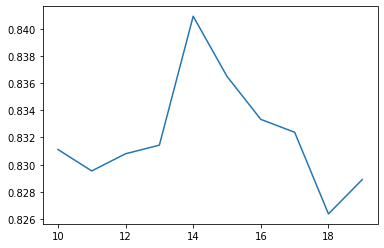

In [ ]:
testing_features(x_train, y_train, x_test, y_test, (10,20), "", False)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [ ]:
min_features_to_select = 50  # Minimum number of features to consider
step = 50
rfecv = RFECV(
    estimator=DecisionTreeClassifier(max_depth=None, criterion="entropy"),
    step=step,
    min_features_to_select=min_features_to_select,
)
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 50


In [ ]:
rfecv.grid_scores_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.82947233, 0.86100386, 0.82743078, 0.81905988, 0.89246619],
       [0.82110682, 0.85456885, 0.82807469, 0.7984546 , 0.89375402],
       [0.81788932, 0.85649936, 0.82678686, 0.80103026, 0.88989053],
       [0.82239382, 0.85714286, 0.81584031, 0.80811333, 0.89246619],
       [0.81724582, 0.85392535, 0.82227946, 0.80167418, 0.89117836],
       [0.82110682, 0.85392535, 0.80231809, 0.78235673, 0.89053445],
       [0.81788932, 0.85392535, 0.80360592, 0.79652286, 0.89439794],
       [0.82368082, 0.85135135, 0.81004507, 0.79909852, 0.89246619],
       [0.81788932, 0.85971686, 0.80618158, 0.79716677, 0.88989053],
       [0.81981982, 0.87129987, 0.7939472 , 0.79652286, 0.89568577],
       [0.81660232, 0.84684685, 0.80167418, 0.79652286, 0.88473921],
       [0.81853282, 0.84555985, 0.80940116, 0.80296201, 0.89117836]])

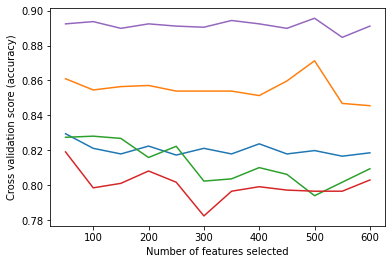

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) * step + min_features_to_select, step),
    rfecv.grid_scores_,
)

# DT Based on Dimensionality Reduction with PCA

In [ ]:
from sklearn.decomposition import PCA

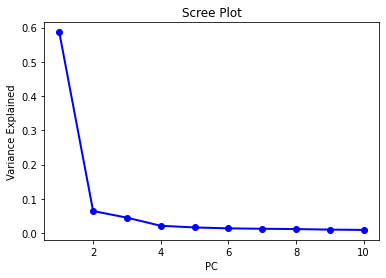

In [ ]:
# from SVM notebook
pca = PCA(n_components=10)
pca_fit = pca.fit(x_train)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca = PCA(n_components=5)
x_components = pca.fit_transform(x_train)
x_train_pca = pd.DataFrame(x_components,columns=['component1','component2', 'component3', 'component4', 'component5'])
x_train_pca

,component1,component2,component3,component4,component5
0,-5.387022,-0.132260,-1.515513,1.477545,-0.235959
1,-5.414531,-0.517030,-1.711622,1.192619,-0.466045
2,-5.368307,-1.026914,-1.835912,0.826466,0.052196
3,-5.556222,-1.421825,-1.469106,1.133111,-0.961365
4,-5.619160,-1.701454,-1.514951,1.034523,-0.518334
...,...,...,...,...,...
7762,5.689451,2.145656,-0.595008,-0.124536,1.460746
7763,5.244816,1.986539,-0.507288,-0.013644,1.639845
7764,5.260608,2.670623,-0.554440,0.423164,1.503727
7765,4.817492,2.918323,-0.679897,0.134552,1.475792


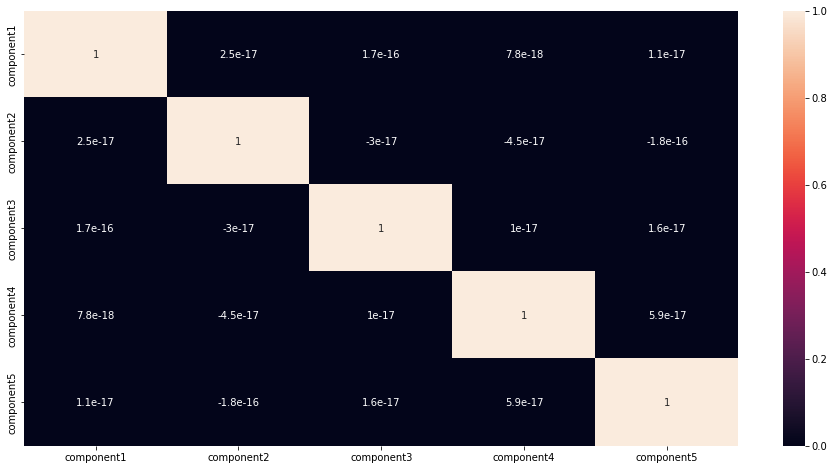

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(x_train_pca.corr(), annot=True, ax=ax)

In [ ]:
x_test_pca = pd.DataFrame(pca.transform(x_test),columns=['component1','component2', 'component3', 'component4', 'component5'])

Decision trees based on: 
Num levels = 10
Decision Tree accuracy for training set: 0.884769
Decision Tree accuracy for test set: 0.744149
----------
Num levels = 11
Decision Tree accuracy for training set: 0.903695
Decision Tree accuracy for test set: 0.742884
----------
Num levels = 12
Decision Tree accuracy for training set: 0.918244
Decision Tree accuracy for test set: 0.743517
----------
Num levels = 13
Decision Tree accuracy for training set: 0.931891
Decision Tree accuracy for test set: 0.734029
----------
Num levels = 14
Decision Tree accuracy for training set: 0.944766
Decision Tree accuracy for test set: 0.733080
----------
Num levels = 15
Decision Tree accuracy for training set: 0.954680
Decision Tree accuracy for test set: 0.730867
----------
Num levels = 16
Decision Tree accuracy for training set: 0.964465
Decision Tree accuracy for test set: 0.725806
----------
Num levels = 17
Decision Tree accuracy for training set: 0.970001
Decision Tree accuracy for test set: 0.728336
-

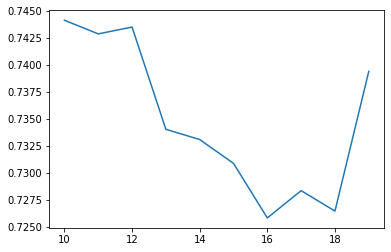

In [ ]:
testing_features(x_train_pca, y_train, x_test_pca, y_test, (10,20), "", False)

## Random forest

In [ ]:
#import model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
# For PCA features. Current results should be for PCA with 10 components
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train_pca, np.ravel(y_train))
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred, target_names=label_list))

                    precision    recall  f1-score   support

           WALKING       1.00      0.97      0.99       545
  WALKING_UPSTAIRS       0.65      0.44      0.52        25
WALKING_DOWNSTAIRS       0.54      0.52      0.53        27
           SITTING       0.81      0.68      0.74       508
          STANDING       0.47      0.75      0.58        32
            LAYING       0.50      0.20      0.29        10
      STAND_TO_SIT       0.76      0.88      0.82       556
      SIT_TO_STAND       0.58      0.39      0.46        49
        SIT_TO_LIE       0.50      0.52      0.51        23
        LIE_TO_SIT       0.86      0.96      0.91       496
      STAND_TO_LIE       0.89      0.78      0.83       420
      LIE_TO_STAND       0.86      0.87      0.87       471

          accuracy                           0.84      3162
         macro avg       0.70      0.66      0.67      3162
      weighted avg       0.85      0.84      0.84      3162



# Correlation comment
I think with 10 components, this should be expected as well.
If I remember correctly, PCA guarantees that each new axis is perpendicular to the previous ones  
So there shouldn't really be any correlation between each component.

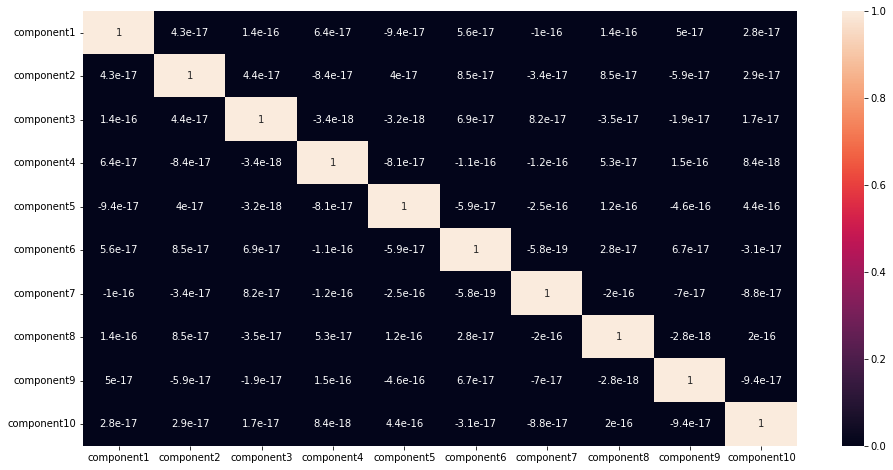

In [ ]:
# Testing correlation with 10 components instead
pca = PCA(n_components=10)
x_components = pca.fit_transform(x_train)
x_train_pca = pd.DataFrame(x_components, columns=["component" + str(i) for i in range(1, 11)])
# Correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(x_train_pca.corr(), annot=True, ax=ax)

count      10.000000
mean     1372.232608
std      2677.689865
min        45.646878
25%       111.812455
50%       222.219760
75%       496.364639
max      8333.638327
dtype: float64


Text(0, 0.5, 'Feature Importance Score')

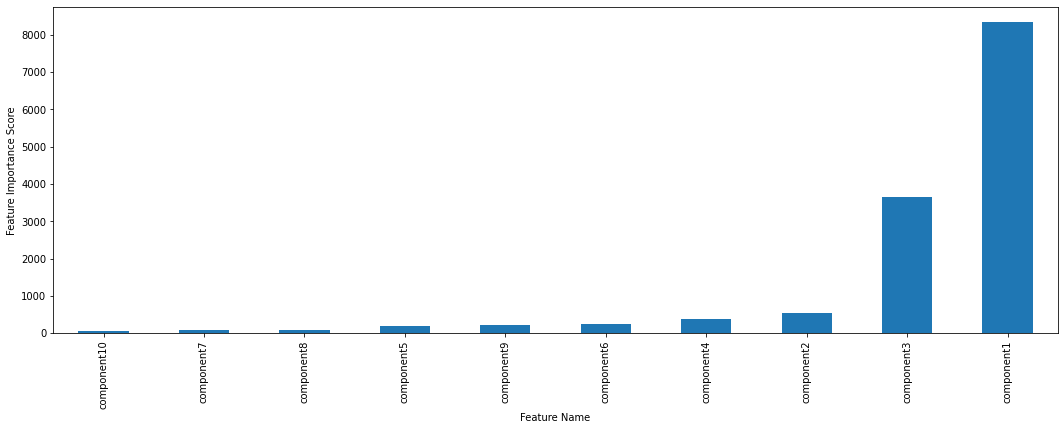

In [ ]:
# feature importance using anova f-value
select = SelectKBest()
select.fit(x_train_pca, np.ravel(y_train))

print(pd.Series(select.scores_).describe())

fig, ax = plt.subplots(1, 1, figsize=(18, 6))
pd.Series(select.scores_, index=x_train_pca.columns).sort_values().plot.bar(ax=ax)
ax.set_xlabel('Feature Name')
ax.set_ylabel('Feature Importance Score')

## Feature importance of PCA features
It seems that two of the PCA axes represent most of capability to differentiate between classes. However, performance still leaves much to be desired. This is likely due to the "feature importance" of underrepresented classes being lower due to class imbalance


In [ ]:
print(pd.Series(select.scores_).sort_values())

9      45.646878
6      72.102571
7      89.644094
4     178.317538
8     212.418682
5     232.020839
3     366.639420
1     539.606379
2    3652.291356
0    8333.638327
dtype: float64


Decision trees based on: 
Num levels = 10
Decision Tree accuracy for training set: 0.920561
Decision Tree accuracy for test set: 0.778305
----------
Num levels = 11
Decision Tree accuracy for training set: 0.934080
Decision Tree accuracy for test set: 0.785579
----------
Num levels = 12
Decision Tree accuracy for training set: 0.950045
Decision Tree accuracy for test set: 0.771347
----------
Num levels = 13
Decision Tree accuracy for training set: 0.960731
Decision Tree accuracy for test set: 0.776407
----------
Num levels = 14
Decision Tree accuracy for training set: 0.970001
Decision Tree accuracy for test set: 0.766287
----------
Num levels = 15
Decision Tree accuracy for training set: 0.976568
Decision Tree accuracy for test set: 0.769766
----------
Num levels = 16
Decision Tree accuracy for training set: 0.981846
Decision Tree accuracy for test set: 0.769133
----------
Num levels = 17
Decision Tree accuracy for training set: 0.986996
Decision Tree accuracy for test set: 0.768185
-

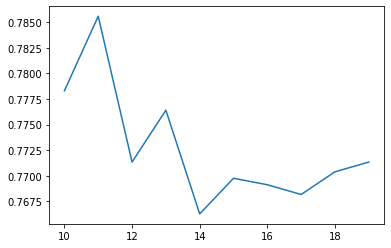

In [ ]:
x_test_pca = pd.DataFrame(pca.transform(x_test),columns=["component" + str(i) for i in range(1, 11)])
testing_features(x_train_pca, y_train, x_test_pca, y_test, (10,20), "", False)

## Comparison of PCA vs non-PCA results
Seems that generally, the PCA results are still considerably worse, and especially so due to the class imbalance, where PCA is likely maximizing the variance on labels with more samples.

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)

rf.fit(x_train, np.ravel(y_train))

RandomForestClassifier(n_estimators=1000)

In [ ]:
# predictions = rf.predict(x_test)
print("Score: " + str(rf.score(x_test, np.ravel(y_test))))
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_list))

Score: 0.9133459835547122
                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       545
  WALKING_UPSTAIRS       0.63      0.68      0.65        25
WALKING_DOWNSTAIRS       0.68      0.56      0.61        27
           SITTING       0.91      0.90      0.90       508
          STANDING       0.69      0.75      0.72        32
            LAYING       0.90      0.90      0.90        10
      STAND_TO_SIT       0.91      0.92      0.91       556
      SIT_TO_STAND       0.71      0.59      0.64        49
        SIT_TO_LIE       0.76      0.83      0.79        23
        LIE_TO_SIT       0.90      0.96      0.93       496
      STAND_TO_LIE       0.96      0.85      0.90       420
      LIE_TO_STAND       0.89      0.92      0.90       471

          accuracy                           0.91      3162
         macro avg       0.83      0.82      0.82      3162
      weighted avg       0.91      0.91      0.91      3162



In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 8)) for feature, importance in zip(list(x_train.columns), importances)]

In [ ]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
for pair in feature_importances:
  print('Variable: {:20} Importance: {}'.format(*pair))

Variable: tXAxisAcc-AngleWRTGravity-1 Importance: 0.02763037
Variable: tGravityAcc-Energy-1 Importance: 0.02714907
Variable: tGravityAcc-Mean-1   Importance: 0.02677034
Variable: tGravityAcc-Min-1    Importance: 0.02638488
Variable: tYAxisAcc-AngleWRTGravity-1 Importance: 0.025494
Variable: tGravityAcc-Max-1    Importance: 0.02508054
Variable: tGravityAcc-Mean-2   Importance: 0.02419483
Variable: tGravityAcc-Max-2    Importance: 0.02278391
Variable: tGravityAcc-Min-2    Importance: 0.0221807
Variable: tGravityAcc-Energy-2 Importance: 0.01401536
Variable: tZAxisAcc-AngleWRTGravity-1 Importance: 0.00993423
Variable: tBodyAcc-Max-1       Importance: 0.00960442
Variable: tGravityAcc-Mean-3   Importance: 0.00947458
Variable: tGravityAcc-Max-3    Importance: 0.00947086
Variable: tGravityAcc-Min-3    Importance: 0.00889789
Variable: tGravityAcc-ARCoeff-9 Importance: 0.00795092
Variable: fBodyAccMag-Energy-1 Importance: 0.00791334
Variable: tGravityAccMag-STD-1 Importance: 0.00788012
Variable:

## Using upsampled data set


In [ ]:
x_train_us = pd.read_csv("/content/drive/MyDrive/HAPT Data Set/x_train_upsampled.csv")
x_trainsplit_train_us = pd.read_csv("/content/drive/MyDrive/HAPT Data Set/x_trainsplit_train_upsampled.csv")
x_trainsplit_val_us = pd.read_csv("/content/drive/MyDrive/HAPT Data Set/x_trainsplit_val_upsampled.csv")
y_train_us = pd.read_csv("/content/drive/MyDrive/HAPT Data Set/y_train_upsampled.csv")
y_trainsplit_train_us = pd.read_csv("/content/drive/MyDrive/HAPT Data Set/y_trainsplit_train_upsampled.csv")
y_trainsplit_val_us = pd.read_csv("/content/drive/MyDrive/HAPT Data Set/y_trainsplit_val_upsampled.csv")

In [ ]:
y_train_us.describe()

,Label
count,17076
unique,12
top,WALKING
freq,1423


In [ ]:
print(set(x_trainsplit_train_us.columns).difference(set(x_test.columns)))
print(set(x_test.columns).difference(set(x_trainsplit_train_us.columns)))

{'tBodyGyro-Energy-2             ', 'fBodyGyro-SMA-1                ', 'tBodyAcc-ARCoeff-1             ', 'tBodyAccMag-Max-1              ', 'fBodyAccJerk-MaxInds-1         ', 'fBodyGyro-BandsEnergyOld-40    ', 'tBodyGyroJerk-ARCoeff-9        ', 'fBodyAccMag-Min-1              ', 'fBodyGyro-BandsEnergyOld-10    ', 'tBodyAcc-Min-1                 ', 'tBodyAccJerk-SMA-1             ', 'tBodyAccMag-Energy-1           ', 'fBodyAccJerk-Energy-3          ', 'tBodyAccMag-ARCoeff-2          ', 'tBodyAcc-ARCoeff-7             ', 'tBodyAcc-IQR-1                 ', 'fBodyAccJerk-IQR-2             ', 'tBodyAcc-Min-2                 ', 'tBodyAcc-ARCoeff-3             ', 'fBodyAcc-BandsEnergyOld-24     ', 'fBodyGyro-MaxInds-1            ', 'tBodyGyro-Mad-2                ', 'tBodyAccMag-ARCoeff-3          ', 'fBodyGyroMag-Kurtosis-1        ', 'tBodyGyro-Correlation-3        ', 'fBodyAcc-BandsEnergyOld-33     ', 'fBodyGyro-BandsEnergyOld-2     ', 'fBodyGyro-BandsEnergyOld-34    ', 'tGravityAcc-Energy

In [ ]:
print(len(x_test.columns))
print(len(x_trainsplit_train_us.columns))

561
561


In [ ]:
a = [x_test.columns,x_trainsplit_train_us.columns]

In [ ]:
for i in range(len(a)):
  print(a[i])

Index(['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3',
       'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Mad-1',
       'tBodyAcc-Mad-2', 'tBodyAcc-Mad-3', 'tBodyAcc-Max-1',
       ...
       'fBodyGyroJerkMag-MeanFreq-1', 'fBodyGyroJerkMag-Skewness-1',
       'fBodyGyroJerkMag-Kurtosis-1', 'tBodyAcc-AngleWRTGravity-1',
       'tBodyAccJerk-AngleWRTGravity-1', 'tBodyGyro-AngleWRTGravity-1',
       'tBodyGyroJerk-AngleWRTGravity-1', 'tXAxisAcc-AngleWRTGravity-1',
       'tYAxisAcc-AngleWRTGravity-1', 'tZAxisAcc-AngleWRTGravity-1'],
      dtype='object', length=561)
Index(['tBodyAcc-Mean-1                ', 'tBodyAcc-Mean-2                ',
       'tBodyAcc-Mean-3                ', 'tBodyAcc-STD-1                 ',
       'tBodyAcc-STD-2                 ', 'tBodyAcc-STD-3                 ',
       'tBodyAcc-Mad-1                 ', 'tBodyAcc-Mad-2                 ',
       'tBodyAcc-Mad-3                 ', 'tBodyAcc-Max-1                 ',
       ...
   

In [ ]:
x_trainsplit_train_us.columns = x_train.columns

In [ ]:
for x, y in zip(list(x_trainsplit_train_us.columns), list(x_test.columns)):
  if x != y:
    print(x + " is different from " + y) 

In [ ]:
x_trainsplit_train_us.columns = headers
x_train_us.columns = headers
x_trainsplit_val_us.columns = headers

In [ ]:
x_trainsplit_train_us.columns = x_train.columns
x_train_us.columns = x_train.columns
x_trainsplit_val_us.columns = x_train.columns

Decision trees based on: 
Num levels = 10
Decision Tree accuracy for training set: 0.981992
Decision Tree accuracy for test set: 0.841240
----------
Num levels = 11
Decision Tree accuracy for training set: 0.993438
Decision Tree accuracy for test set: 0.826376
----------
Num levels = 12
Decision Tree accuracy for training set: 0.998542
Decision Tree accuracy for test set: 0.822897
----------
Num levels = 13
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.839342
----------
Num levels = 14
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.835863
----------
Num levels = 15
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.831436
----------
Num levels = 16
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.834598
----------
Num levels = 17
Decision Tree accuracy for training set: 1.000000
Decision Tree accuracy for test set: 0.832068
-

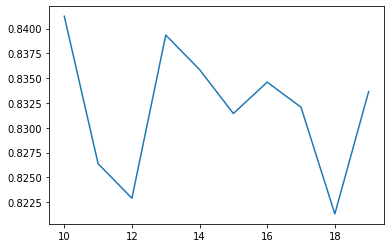

In [ ]:
testing_features(x_trainsplit_train_us, y_trainsplit_train_us, x_test, y_test, (10,20), "", False)

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_us, np.ravel(y_train_us))
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_list))

                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       545
  WALKING_UPSTAIRS       0.64      0.72      0.68        25
WALKING_DOWNSTAIRS       0.67      0.52      0.58        27
           SITTING       0.91      0.89      0.90       508
          STANDING       0.64      0.72      0.68        32
            LAYING       0.91      1.00      0.95        10
      STAND_TO_SIT       0.91      0.92      0.91       556
      SIT_TO_STAND       0.73      0.73      0.73        49
        SIT_TO_LIE       0.83      0.87      0.85        23
        LIE_TO_SIT       0.89      0.97      0.93       496
      STAND_TO_LIE       0.96      0.85      0.91       420
      LIE_TO_STAND       0.89      0.89      0.89       471

          accuracy                           0.91      3162
         macro avg       0.83      0.84      0.83      3162
      weighted avg       0.91      0.91      0.91      3162



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
clf.fit(x_train_us, np.ravel(y_train_us))
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_list))

                    precision    recall  f1-score   support

           WALKING       1.00      0.99      0.99       545
  WALKING_UPSTAIRS       0.67      0.64      0.65        25
WALKING_DOWNSTAIRS       0.65      0.63      0.64        27
           SITTING       0.90      0.86      0.88       508
          STANDING       0.73      0.84      0.78        32
            LAYING       0.83      1.00      0.91        10
      STAND_TO_SIT       0.88      0.92      0.90       556
      SIT_TO_STAND       0.77      0.67      0.72        49
        SIT_TO_LIE       0.50      0.70      0.58        23
        LIE_TO_SIT       0.90      0.98      0.94       496
      STAND_TO_LIE       0.97      0.89      0.93       420
      LIE_TO_STAND       0.90      0.89      0.90       471

          accuracy                           0.91      3162
         macro avg       0.81      0.83      0.82      3162
      weighted avg       0.91      0.91      0.91      3162



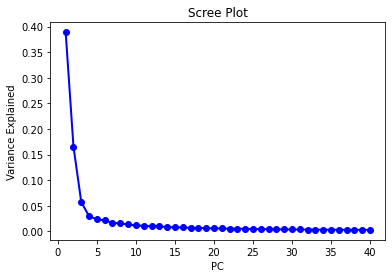

In [ ]:
# from SVM notebook
pca = PCA(n_components=40)
pca_fit = pca.fit(x_train_us)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

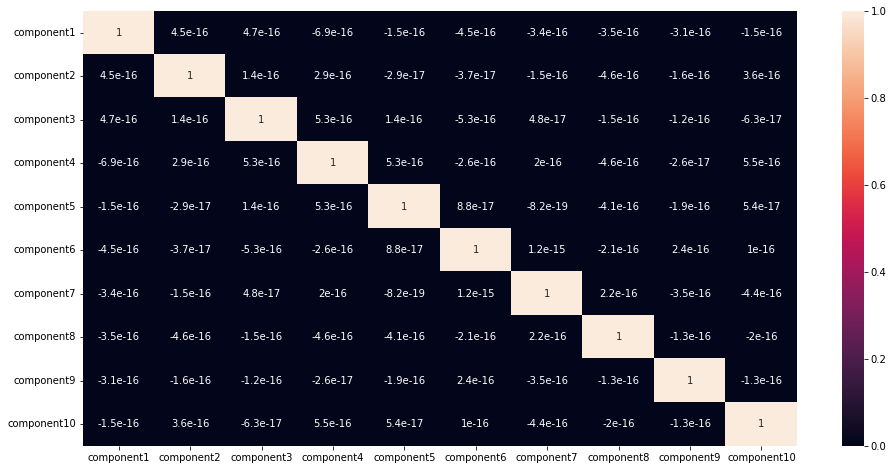

In [ ]:
# Testing correlation with 10 components
pca = PCA(n_components=10)
x_components = pca.fit_transform(x_train_us)
x_train_pca = pd.DataFrame(x_components, columns=["component" + str(i) for i in range(1, 11)])
# Correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(x_train_pca.corr(), annot=True, ax=ax)

count      10.000000
mean     2637.188194
std      3589.223343
min        62.408681
25%       306.478543
50%       496.105751
75%      4329.611791
max      9909.917029
dtype: float64


Text(0, 0.5, 'Feature Importance Score')

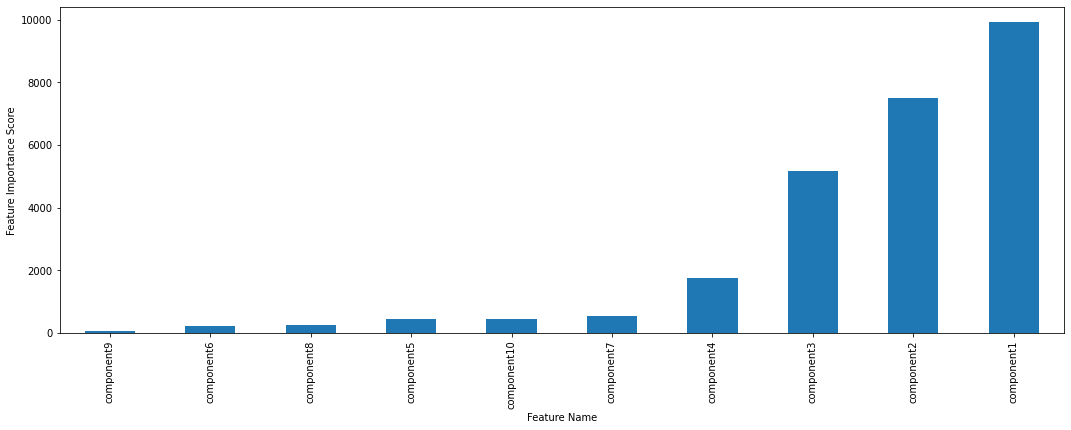

In [ ]:
# feature importance using anova f-value
select = SelectKBest()
select.fit(x_train_pca, np.ravel(y_train_us))

print(pd.Series(select.scores_).describe())

fig, ax = plt.subplots(1, 1, figsize=(18, 6))
pd.Series(select.scores_, index=x_train_pca.columns).sort_values().plot.bar(ax=ax)
ax.set_xlabel('Feature Name')
ax.set_ylabel('Feature Importance Score')

In [ ]:
x_test_pca = pd.DataFrame(pca.transform(x_test), columns=["component" + str(i) for i in range(1, 11)])

Decision trees based on: 
Num levels = 10
Decision Tree accuracy for training set: 0.948934
Decision Tree accuracy for test set: 0.732764
----------
Num levels = 11
Decision Tree accuracy for training set: 0.968552
Decision Tree accuracy for test set: 0.735294
----------
Num levels = 12
Decision Tree accuracy for training set: 0.979796
Decision Tree accuracy for test set: 0.739722
----------
Num levels = 13
Decision Tree accuracy for training set: 0.987234
Decision Tree accuracy for test set: 0.727071
----------
Num levels = 14
Decision Tree accuracy for training set: 0.990864
Decision Tree accuracy for test set: 0.732764
----------
Num levels = 15
Decision Tree accuracy for training set: 0.994437
Decision Tree accuracy for test set: 0.730867
----------
Num levels = 16
Decision Tree accuracy for training set: 0.995666
Decision Tree accuracy for test set: 0.730867
----------
Num levels = 17
Decision Tree accuracy for training set: 0.997599
Decision Tree accuracy for test set: 0.733080
-

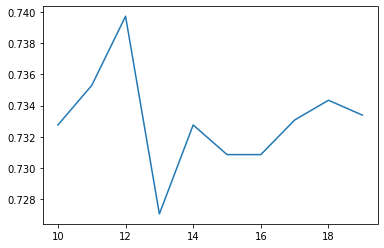

In [ ]:
testing_features(x_train_pca, y_train_us, x_test_pca, y_test, (10,20), "", False)

In [ ]:
# For PCA features. Current results should be for PCA with 10 components
# rf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=15)
pca = PCA(n_components=10)
x_components = pca.fit_transform(x_train_us)
x_train_pca = pd.DataFrame(x_components, columns=["component" + str(i) for i in range(1, 11)])
x_test_pca = pd.DataFrame(pca.transform(x_test), columns=["component" + str(i) for i in range(1, 11)])
rf = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf.fit(x_train_pca, np.ravel(y_train_us))
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred, target_names=label_list))

                    precision    recall  f1-score   support

           WALKING       1.00      0.96      0.98       545
  WALKING_UPSTAIRS       0.46      0.48      0.47        25
WALKING_DOWNSTAIRS       0.45      0.37      0.41        27
           SITTING       0.77      0.69      0.73       508
          STANDING       0.54      0.66      0.59        32
            LAYING       0.90      0.90      0.90        10
      STAND_TO_SIT       0.75      0.83      0.79       556
      SIT_TO_STAND       0.57      0.55      0.56        49
        SIT_TO_LIE       0.64      0.70      0.67        23
        LIE_TO_SIT       0.76      0.86      0.80       496
      STAND_TO_LIE       0.74      0.70      0.72       420
      LIE_TO_STAND       0.83      0.76      0.80       471

          accuracy                           0.79      3162
         macro avg       0.70      0.71      0.70      3162
      weighted avg       0.80      0.79      0.79      3162



In [ ]:
pca = PCA(n_components=10)
x_components = pca.fit_transform(x_train_us)
x_train_pca = pd.DataFrame(x_components, columns=["component" + str(i) for i in range(1, 11)])
x_test_pca = pd.DataFrame(pca.transform(x_test), columns=["component" + str(i) for i in range(1, 11)])
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
clf.fit(x_train_pca, np.ravel(y_train_us))
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred, target_names=label_list))

                    precision    recall  f1-score   support

           WALKING       1.00      0.96      0.98       545
  WALKING_UPSTAIRS       0.46      0.48      0.47        25
WALKING_DOWNSTAIRS       0.45      0.37      0.41        27
           SITTING       0.77      0.69      0.73       508
          STANDING       0.53      0.62      0.57        32
            LAYING       0.90      0.90      0.90        10
      STAND_TO_SIT       0.75      0.83      0.79       556
      SIT_TO_STAND       0.56      0.55      0.56        49
        SIT_TO_LIE       0.64      0.70      0.67        23
        LIE_TO_SIT       0.76      0.86      0.80       496
      STAND_TO_LIE       0.74      0.70      0.72       420
      LIE_TO_STAND       0.83      0.76      0.80       471

          accuracy                           0.79      3162
         macro avg       0.70      0.70      0.70      3162
      weighted avg       0.80      0.79      0.79      3162



Decision trees based on: 
Num levels = 10
Decision Tree accuracy for training set: 0.908761
Decision Tree accuracy for test set: 0.761543
----------
Num levels = 11
Decision Tree accuracy for training set: 0.930429
Decision Tree accuracy for test set: 0.745414
----------
Num levels = 12
Decision Tree accuracy for training set: 0.959710
Decision Tree accuracy for test set: 0.737824
----------
Num levels = 13
Decision Tree accuracy for training set: 0.972710
Decision Tree accuracy for test set: 0.732132
----------
Num levels = 14
Decision Tree accuracy for training set: 0.982841
Decision Tree accuracy for test set: 0.731499
----------
Num levels = 15
Decision Tree accuracy for training set: 0.988698
Decision Tree accuracy for test set: 0.728969
----------
Num levels = 16
Decision Tree accuracy for training set: 0.992855
Decision Tree accuracy for test set: 0.728969
----------
Num levels = 17
Decision Tree accuracy for training set: 0.994612
Decision Tree accuracy for test set: 0.726123
-

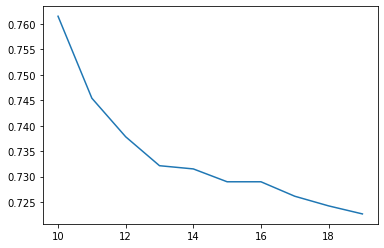

In [ ]:
pca = PCA(n_components=4)
x_components = pca.fit_transform(x_train_us)
x_train_pca = pd.DataFrame(x_components, columns=["component" + str(i) for i in range(1, 5)])
x_test_pca = pd.DataFrame(pca.transform(x_test), columns=["component" + str(i) for i in range(1, 5)])
testing_features(x_train_pca, y_train_us, x_test_pca, y_test, (10,20), "", False)

In [ ]:
# For PCA features. Current results should be for PCA with 4 components
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train_pca, np.ravel(y_train_us))
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test, y_pred, target_names=label_list))

                    precision    recall  f1-score   support

           WALKING       0.99      0.96      0.97       545
  WALKING_UPSTAIRS       0.46      0.48      0.47        25
WALKING_DOWNSTAIRS       0.48      0.52      0.50        27
           SITTING       0.73      0.61      0.66       508
          STANDING       0.47      0.50      0.48        32
            LAYING       0.50      0.80      0.62        10
      STAND_TO_SIT       0.70      0.81      0.75       556
      SIT_TO_STAND       0.53      0.49      0.51        49
        SIT_TO_LIE       0.42      0.48      0.45        23
        LIE_TO_SIT       0.72      0.86      0.79       496
      STAND_TO_LIE       0.72      0.63      0.67       420
      LIE_TO_STAND       0.83      0.76      0.79       471

          accuracy                           0.76      3162
         macro avg       0.63      0.66      0.64      3162
      weighted avg       0.77      0.76      0.76      3162



## Gridsearch
using:
- DT & RF

In [ ]:
from sklearn.model_selection import GridSearchCV
import pickle
import joblib

In [ ]:
model = DecisionTreeClassifier()

max_depth=[None, 4, 10, 20, 50]
min_samples_split=[2]
min_samples_leaf=[1]
max_features=[None, 'sqrt']
random_state=[5]

param_grid = dict(criterion=['entropy'], max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=random_state)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, error_score='raise', verbose=0)
grid_result = grid.fit(x_train, y_train)

# save results
with open('dt_cv_results.pickle', 'wb') as handle:
    pickle.dump(grid_result, handle, protocol=pickle.DEFAULT_PROTOCOL)

Best: 0.836745 using {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.836745 (0.032243) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.815114 (0.008109) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.826451 (0.034830) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.611825 (0.034061) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.830822 (0.034227) with: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.794131 (0.023828) with: {'criterion': 'entropy', 'max_depth

In [ ]:
with open('dt_cv_results.pickle', 'rb') as handle:
    dt_grid_result = pickle.load(handle)

In [ ]:
print("Best: %f using %s" % (dt_grid_result.best_score_, dt_grid_result.best_params_))
means = dt_grid_result.cv_results_['mean_test_score']
stds = dt_grid_result.cv_results_['std_test_score']
params = dt_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836745 using {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.836745 (0.032243) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.815114 (0.008109) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.826451 (0.034830) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.611825 (0.034061) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.830822 (0.034227) with: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 5}
0.794131 (0.023828) with: {'criterion': 'entropy', 'max_depth

In [ ]:
dt = DecisionTreeClassifier(criterion="entropy", random_state=5)
dt.fit(x_train, np.ravel(y_train))
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_list))

                    precision    recall  f1-score   support

           WALKING       1.00      0.99      1.00       545
  WALKING_UPSTAIRS       0.50      0.40      0.44        25
WALKING_DOWNSTAIRS       0.45      0.48      0.46        27
           SITTING       0.82      0.79      0.80       508
          STANDING       0.61      0.62      0.62        32
            LAYING       0.75      0.90      0.82        10
      STAND_TO_SIT       0.81      0.85      0.83       556
      SIT_TO_STAND       0.58      0.61      0.59        49
        SIT_TO_LIE       0.65      0.48      0.55        23
        LIE_TO_SIT       0.79      0.92      0.85       496
      STAND_TO_LIE       0.85      0.81      0.83       420
      LIE_TO_STAND       0.82      0.72      0.77       471

          accuracy                           0.84      3162
         macro avg       0.72      0.71      0.71      3162
      weighted avg       0.84      0.84      0.83      3162



In [ ]:
model = RandomForestClassifier()

n_estimators=[100,200,400,800,1200]
max_depth=[None, 4, 10, 20, 50]
min_samples_split=[2]
min_samples_leaf=[1]
max_features=[None, 'sqrt']
random_state=[5]

param_grid = dict(criterion=['entropy'], n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, random_state=random_state)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, error_score='raise', verbose=2)
grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# save results
with open('rf_cv_results.pickle', 'wb') as handle:
    pickle.dump(grid_result, handle, protocol=pickle.DEFAULT_PROTOCOL)

In [ ]:
with open('rf_cv_results.pickle', 'rb') as handle:
    rf_grid_result = pickle.load(handle)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.3 when using version 1.0.2. This might lead to breaking code or invalid results. Use a

In [ ]:
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))
means = rf_grid_result.cv_results_['mean_test_score']
stds = rf_grid_result.cv_results_['std_test_score']
params = rf_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.919665 using {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 5}
0.889924 (0.024104) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 5}
0.890954 (0.024346) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 5}
0.891984 (0.024379) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 5}
0.891083 (0.024365) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800, 'random_state': 5}
0.891212 (0.024877) with: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_lea

In [ ]:
rfc = RandomForestClassifier(n_estimators=400, max_features='sqrt', criterion="entropy", random_state=5)
rfc.fit(x_train, np.ravel(y_train))
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred, target_names=label_list))

                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       545
  WALKING_UPSTAIRS       0.68      0.68      0.68        25
WALKING_DOWNSTAIRS       0.67      0.52      0.58        27
           SITTING       0.93      0.89      0.91       508
          STANDING       0.68      0.78      0.72        32
            LAYING       0.90      0.90      0.90        10
      STAND_TO_SIT       0.91      0.95      0.93       556
      SIT_TO_STAND       0.72      0.57      0.64        49
        SIT_TO_LIE       0.76      0.83      0.79        23
        LIE_TO_SIT       0.90      0.97      0.93       496
      STAND_TO_LIE       0.96      0.84      0.89       420
      LIE_TO_STAND       0.88      0.92      0.90       471

          accuracy                           0.92      3162
         macro avg       0.83      0.82      0.82      3162
      weighted avg       0.92      0.92      0.92      3162

